# Project: Crawling Amazon Reviews

### Introduction
- **Background**: Flossing is a significant component of oral hygiene, particularly in maintaining gum health and the integrity of teeth. As an individual undergoing orthodontic treatment with braces, the importance of effective cleaning methods is magnified. In this context, my dentist has recommended the use of both traditional physical floss and a water flosser. To determine the most suitable water flosser, I will conduct a comprehensive analysis of products available on Amazon, focusing on two specific items: the top-selling water flosser and another that comes highly recommended by a personal acquaintance. This study will involve crawling product reviews to identify frequently occurring keywords and performing sentiment analysis to assess the ratio of positive to negative feedback. Through this approach, I aim to provide a thorough evaluation of consumer perceptions regarding these water flossers.

- **Aim**: Evaluate and compare two water flossers by analyzing product reviews on Amazon

### Methodology
1. Scraping Customer Reviews (Selenium, WebDriver)
2. Creating WordCloud (Morpheme Analysis using SpaCy, WordCloud, Matplotlib.pyplot)
3. Sentiment Analysis


In [197]:
# Requirements 
!pip install selenium 
# brew install chromedriver

In [198]:

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import time
import re

driver_path = "/usr/local/bin/chromedriver" #output of "which chromedriver"
# 1. ChromeDriver Setup
service = Service(driver_path)  # Modifying the path to suit the local environment
options = Options()
options.add_argument("--start-maximized")
options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 Chrome/120 Safari/537.36")

driver = webdriver.Chrome(service=service, options=options)

### First Product

In [208]:
# 2. Amazon Product URL - Product 1: Nicwell Water Dental Flosser 
driver.get("https://www.amazon.com/dp/B08SM447BQ")
time.sleep(3)

In [209]:
# 3. Clicking Review Tab 
driver.find_element(By.CSS_SELECTOR, "a[id='acrCustomerReviewLink']").click()
time.sleep(3)

In [210]:
# 3-1. Clicking 'See All Reviews' button
next_page = driver.find_element(By.CSS_SELECTOR, "[data-hook='see-all-reviews-link-foot']")
next_page.click()
time.sleep(3)

In [211]:
# 4. Collecting Reviews
reviews = []
page = 1
max_pages = 5  # Up to 5 Pages

while page <= max_pages:
    print(f"Collecting info on 📄 page {page}...")

    review_elements = driver.find_elements(By.CSS_SELECTOR, "li[data-hook='review']")
    for r in review_elements:
        try:
            # Title
            title = r.find_element(By.CSS_SELECTOR, "[data-hook='review-title']").text.strip()

            # Date
            date = r.find_element(By.CSS_SELECTOR, "[data-hook='review-date']").text.strip()

            # Body
            body = r.find_element(By.CSS_SELECTOR, "[data-hook='review-body']").text.strip()

            reviews.append({
                # "rating": rating,
                "title": title,
                "date": date,
                "body": body
            })

        except Exception as e:
            print("❌ Failed to parse reviews:", e)
            continue

    # Clicking next page
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, "li.a-last a")
        next_button.click()
        page += 1
        time.sleep(3)
    except NoSuchElementException:
        print("⛔️ No more pages ahead.")
        break

# 5. Converting the results into a DataFrame 
df = pd.DataFrame(reviews)
print(df)

# 6. Saving into .csv
df.to_csv("amazon_reviews.csv", index=False)

# driver.quit()


                                                title  \
0                                 Surprisingly Great!   
1   Replaced after emailing Nicwell customer servi...   
2                                Great while it lasts   
3        Buy this instead of the fancy expensive ones   
4        A bit awkward at first, but totally worth it   
5   ⭐️⭐️⭐️⭐️⭐️ Amazing Water Flosser – A Game Chan...   
6                    DOES NOT COME WITH CHARGING CORD   
7   Updated review. Disappointed but seller stood ...   
8         8 months, no longer works. Seller refunded.   
9               Charging your Nickwell Oral Irrigator   
10                                           Good buy   
11      Mixed experiences, but good customer service.   
12                                Very Good Water Pik   
13  Absolutely incredible for the price wish there...   
14                                       Easy to use!   
15                                    Good water pick   
16                      Its Goo

In [212]:
# Checking the DataFrame
df.head()

,title,date,body
0,Surprisingly Great!,"Reviewed in the United States on November 3, 2022",I’m writing this review because I am actually\...
1,Replaced after emailing Nicwell customer servi...,"Reviewed in the United States on December 29, ...","For the first month, the water flosser was eve..."
2,Great while it lasts,"Reviewed in the United States on June 6, 2025",I bought this and enjoyed it for about a year ...
3,Buy this instead of the fancy expensive ones,"Reviewed in the United States on May 29, 2025",We bought this water flosser in late 2022 and ...
4,"A bit awkward at first, but totally worth it","Reviewed in the United States on June 14, 2025",My dentist told me to get a water flosser and ...


In [213]:
df.columns

Index(['title', 'date', 'body'], dtype='object')

In [214]:
# Merging all titles/bodies into a string with ' ' 
all_title = (df['title']+' ').sum()
all_body = (df['body']+' ').sum()

In [215]:
all_title

'Surprisingly Great! Replaced after emailing Nicwell customer service….Thank you Nicwell Great while it lasts Buy this instead of the fancy expensive ones A bit awkward at first, but totally worth it ⭐️⭐️⭐️⭐️⭐️ Amazing Water Flosser – A Game Changer for My Oral Hygiene! DOES NOT COME WITH CHARGING CORD Updated review. Disappointed but seller stood behind product. 8 months, no longer works. Seller refunded. Charging your Nickwell Oral Irrigator Good buy Mixed experiences, but good customer service. Very Good Water Pik Absolutely incredible for the price wish there was a little lower setting on the pressure Easy to use! Good water pick Its Good. it will do the job. Love it This thing is mighty!! Easy to use product. Amazing Great for Dental Hygiene Water flosser works great and the seller’s customer service is amazing! Great Flosser! Great Surprisingly good Nicwell Water Dental Flosser: Power A+ Battery Charge A+ Durability B STRONG!! Love it, highly recommend. Edited to 4 stars April 20

In [216]:
all_body

"I’m writing this review because I am actually\nOverly satisfied with this product. There are many high quality brands that have similar “water flossers” with high price tags. The price on this was relatively inexpensive so I decided to try it knowing Amazon’s great return policy.\n\nI’ve had it for just over a week and I’m borderline addicted to how good my teeth feel after using this along with normal brushing and mouthwash. It’s a legit “just left the dentist feeling” I can say for the price it is a good value and works great.\n\nThis comes with a few extra standard heads, a specialized head with small brush for braces and a tongue scraper. I primarily use the standard head which is just a small jet that allows you to shoot the water stream between your teeth. I also have used the tongue scraper just to try it and it’s not bad. Allows you to scrape your tongue while a stream of water cleans and rinses.\n\nAnyone who flosses regularly knows it sucks and can be gross. Let’s face it, y

## Creating a WordCloud

In [217]:
# Requirement 
!pip3 install wordcloud

In [218]:
import pandas as pd 
df = pd.read_csv("amazon_reviews.csv")
df.head()

,title,date,body
0,Surprisingly Great!,"Reviewed in the United States on November 3, 2022",I’m writing this review because I am actually\...
1,Replaced after emailing Nicwell customer servi...,"Reviewed in the United States on December 29, ...","For the first month, the water flosser was eve..."
2,Great while it lasts,"Reviewed in the United States on June 6, 2025",I bought this and enjoyed it for about a year ...
3,Buy this instead of the fancy expensive ones,"Reviewed in the United States on May 29, 2025",We bought this water flosser in late 2022 and ...
4,"A bit awkward at first, but totally worth it","Reviewed in the United States on June 14, 2025",My dentist told me to get a water flosser and ...


In [219]:
all_words_body = (df['body']+' ').sum() #str
all_words_title = (df['title']+' ').sum() #str

### Regular Expression

In [220]:
import re

## Example
text = "Hello! 123 ^&* Python is fun."

# Only Extract English Alphabetical Characters (Upper and lowercases)
english_only = re.findall(r'[A-Za-z]+', text)

print(english_only)

['Hello', 'Python', 'is', 'fun']


In [221]:
# Extracting English Alphabetical Characters from the Review (Body)
body_cl = re.findall(r'[A-Za-z]+', all_words_body)
body_list = []
for w in body_cl:
    if len(w) > 1:
        body_list.append(w)
body_list

['writing',
 'this',
 'review',
 'because',
 'am',
 'actually',
 'Overly',
 'satisfied',
 'with',
 'this',
 'product',
 'There',
 'are',
 'many',
 'high',
 'quality',
 'brands',
 'that',
 'have',
 'similar',
 'water',
 'flossers',
 'with',
 'high',
 'price',
 'tags',
 'The',
 'price',
 'on',
 'this',
 'was',
 'relatively',
 'inexpensive',
 'so',
 'decided',
 'to',
 'try',
 'it',
 'knowing',
 'Amazon',
 'great',
 'return',
 'policy',
 've',
 'had',
 'it',
 'for',
 'just',
 'over',
 'week',
 'and',
 'borderline',
 'addicted',
 'to',
 'how',
 'good',
 'my',
 'teeth',
 'feel',
 'after',
 'using',
 'this',
 'along',
 'with',
 'normal',
 'brushing',
 'and',
 'mouthwash',
 'It',
 'legit',
 'just',
 'left',
 'the',
 'dentist',
 'feeling',
 'can',
 'say',
 'for',
 'the',
 'price',
 'it',
 'is',
 'good',
 'value',
 'and',
 'works',
 'great',
 'This',
 'comes',
 'with',
 'few',
 'extra',
 'standard',
 'heads',
 'specialized',
 'head',
 'with',
 'small',
 'brush',
 'for',
 'braces',
 'and',
 'tong

In [222]:
# Converting the list into a string
body_str = ' '.join(body_list)

### English Morphemes Analysis Library

In [223]:
# Requirement 
!pip install nltk spacy
!python -m nltk.downloader punkt
!python -m spacy download en_core_web_sm

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /Users/eunahjung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [224]:
import spacy

# Load the English Model
nlp = spacy.load("en_core_web_sm")

# List of PoS 
target_pos = ["NOUN", "VERB", "ADJ", "ADV"]

# Function to extract morphemes 
def extract_morphemes(text, target_pos):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in target_pos and not token.is_stop]

In [225]:
words = extract_morphemes(all_words_title, [ "ADJ", "ADV"])
words_2 = extract_morphemes(body_str, ["ADJ", "ADV"])
words += words_2 


In [226]:
print(words)

['surprisingly', 'great', 'great', 'instead', 'fancy', 'expensive', 'awkward', 'totally', 'worth', 'disappointed', 'long', 'mixed', 'good', 'absolutely', 'incredible', 'little', 'low', 'easy', 'good', 'mighty', 'easy', 'amazing', 'great', 'amazing', 'great', 'great', 'surprisingly', 'good', 'highly', 'recommend', 'product', 'easy', 'convenient', 'good', 'clean', 'personal', 'great', 'great', 'excellent', 'great', 'especially', 'good', 'pretty', 'good', 'actually', 'overly', 'satisfied', 'high', 'similar', 'high', 'relatively', 'inexpensive', 'great', 'good', 'normal', 'good', 'great', 'extra', 'standard', 'small', 'primarily', 'standard', 'small', 'bad', 'regularly', 'gross', 'old', 'necessary', 'healthy', 'small', 'plastic', 'decent', 'dental', 'usually', 'well', 'quick', 'floss', 'different', 'standard', 'constant', 'aggressive', 'slightly', 'warm', 'cold', 'fun', 'warm', 'way', 'well', 'easy', 'exactly', 'great', 'literally', 'fresh', 'small', 'quickly', 'easy', 'wouldn', 'large', '

In [227]:
# Filtering out irrelevant words 
my_stop_words = ['great','buy','email','good','maybe','feel','try','use','last','think','work']

new_list = []
for w in words:
    if w not in my_stop_words:
        new_list.append(w)
print(new_list)

['surprisingly', 'instead', 'fancy', 'expensive', 'awkward', 'totally', 'worth', 'disappointed', 'long', 'mixed', 'absolutely', 'incredible', 'little', 'low', 'easy', 'mighty', 'easy', 'amazing', 'amazing', 'surprisingly', 'highly', 'recommend', 'product', 'easy', 'convenient', 'clean', 'personal', 'excellent', 'especially', 'pretty', 'actually', 'overly', 'satisfied', 'high', 'similar', 'high', 'relatively', 'inexpensive', 'normal', 'extra', 'standard', 'small', 'primarily', 'standard', 'small', 'bad', 'regularly', 'gross', 'old', 'necessary', 'healthy', 'small', 'plastic', 'decent', 'dental', 'usually', 'well', 'quick', 'floss', 'different', 'standard', 'constant', 'aggressive', 'slightly', 'warm', 'cold', 'fun', 'warm', 'way', 'well', 'easy', 'exactly', 'literally', 'fresh', 'small', 'quickly', 'easy', 'wouldn', 'large', 'bulky', 'big', 'quickly', 'usually', 'second', 'round', 'careful', 'strong', 'awkward', 'well', 'easy', 'twice', 'low', 'sure', 'long', 'definitely', 'nightly', 'r

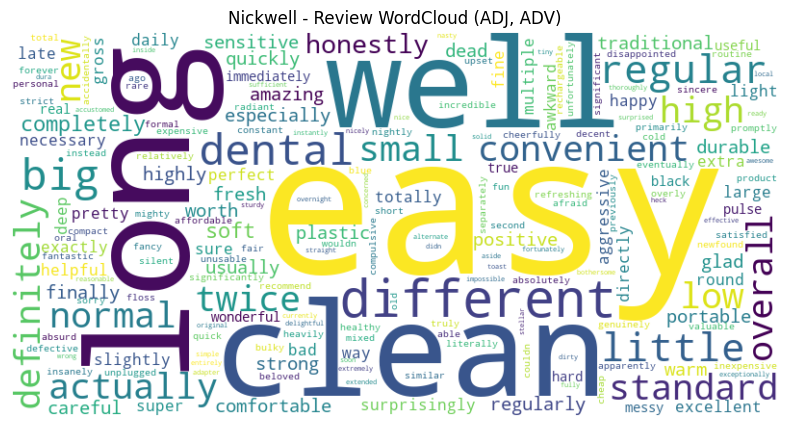

In [228]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_for_wordcloud = ' '.join(new_list)
text_for_wordcloud

# Creating a WordCloud
wc = WordCloud(width=800, height=400, background_color="white").generate(text_for_wordcloud)

# Visualization
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Nickwell - Review WordCloud (ADJ, ADV)")
plt.show()


In [229]:
# Counting how many times each word appeared
from collections import Counter

word_counts = Counter(words)
word_counts

Counter({'great': 33,
         'easy': 26,
         'good': 19,
         'long': 12,
         'clean': 10,
         'well': 9,
         'different': 9,
         'dental': 6,
         'big': 6,
         'little': 5,
         'regular': 5,
         'low': 4,
         'convenient': 4,
         'actually': 4,
         'high': 4,
         'normal': 4,
         'standard': 4,
         'small': 4,
         'twice': 4,
         'definitely': 4,
         'new': 4,
         'overall': 4,
         'honestly': 4,
         'completely': 4,
         'soft': 4,
         'worth': 3,
         'amazing': 3,
         'highly': 3,
         'especially': 3,
         'regularly': 3,
         'plastic': 3,
         'usually': 3,
         'warm': 3,
         'fresh': 3,
         'quickly': 3,
         'careful': 3,
         'strong': 3,
         'finally': 3,
         'traditional': 3,
         'dead': 3,
         'durable': 3,
         'glad': 3,
         'sensitive': 3,
         'comfortable': 3,
         '

In [230]:
# What does 'twice' imply in the review? 
    # Have to use it 'twice' per session = not clean enough? 
    # or simply floss 'twice' a day? 
print(df['body'].loc[df['body'].str.contains('twice')].sum())

I’m writing this review because I am actually
Overly satisfied with this product. There are many high quality brands that have similar “water flossers” with high price tags. The price on this was relatively inexpensive so I decided to try it knowing Amazon’s great return policy.

I’ve had it for just over a week and I’m borderline addicted to how good my teeth feel after using this along with normal brushing and mouthwash. It’s a legit “just left the dentist feeling” I can say for the price it is a good value and works great.

This comes with a few extra standard heads, a specialized head with small brush for braces and a tongue scraper. I primarily use the standard head which is just a small jet that allows you to shoot the water stream between your teeth. I also have used the tongue scraper just to try it and it’s not bad. Allows you to scrape your tongue while a stream of water cleans and rinses.

Anyone who flosses regularly knows it sucks and can be gross. Let’s face it, you are r

In [231]:
top_10 = word_counts.most_common(10)
print(top_10)

[('great', 33), ('easy', 26), ('good', 19), ('long', 12), ('clean', 10), ('well', 9), ('different', 9), ('dental', 6), ('big', 6), ('little', 5)]


In [232]:
print("📌 Top 10 Most Frequently Appearing Words:")
for word, count in top_10:
    print(f"{word:<12} → {count} times")


📌 Top 10 Most Frequently Appearing Words:
great        → 33 times
easy         → 26 times
good         → 19 times
long         → 12 times
clean        → 10 times
well         → 9 times
different    → 9 times
dental       → 6 times
big          → 6 times
little       → 5 times


### Second Product

In [233]:
# Amazon Product URL - Product 2: COSLUS Water Pick (#1 Best Seller)
driver.get("https://www.amazon.com/dp/B0BG52SJ5N")
time.sleep(3)

In [234]:
# 3. Clicking the Review Tab
driver.find_element(By.CSS_SELECTOR, "a[id='acrCustomerReviewLink']").click()
time.sleep(3)

In [235]:
# 3-1. Clicking 'See All Reviews' button
next_page = driver.find_element(By.CSS_SELECTOR, "[data-hook='see-all-reviews-link-foot']")
next_page.click()
time.sleep(3)

In [236]:
# 4. Collecting Reviews
reviews_coslus = []
page = 1
max_pages = 5  # Up to 5 pages

while page <= max_pages:
    print(f"📄 Collecting information on page {page}...")

    review_elements = driver.find_elements(By.CSS_SELECTOR, "li[data-hook='review']")
    for r in review_elements:
        try:
            # Title
            title = r.find_element(By.CSS_SELECTOR, "[data-hook='review-title']").text.strip()

            # Date
            date = r.find_element(By.CSS_SELECTOR, "[data-hook='review-date']").text.strip()

            # Body
            body = r.find_element(By.CSS_SELECTOR, "[data-hook='review-body']").text.strip()

            reviews_coslus.append({
                "title": title,
                "date": date,
                "body": body
            })

        except Exception as e:
            print("❌ Failed to parse:", e)
            continue

    # Clicking next page
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, "li.a-last a")
        next_button.click()
        page += 1
        time.sleep(3)
    except NoSuchElementException:
        print("⛔️ No more pages ahead.")
        break

# 5. Result
df2 = pd.DataFrame(reviews_coslus)
print(df2)

# 6. Saving to .csv
df2.to_csv("amazon_reviews_coslus.csv", index=False)

# driver.quit()


📄 Collecting information on page 1...
📄 Collecting information on page 2...
📄 Collecting information on page 3...
📄 Collecting information on page 4...
📄 Collecting information on page 5...
                                                title  \
0                       Incredible All-Around Flosser   
1      Powerful, Portable, and Perfect for Daily Use!   
2                                       Does the job!   
3   Absolute game-changer for oral care—my mouth h...   
4                                   Very useful tool!   
5           Good water pressure, long lasting battery   
6                         Nice Pressure, Solid So Far   
7   No cord and does the job intended as my first ...   
8                                 Great water flosser   
9   A Powerful and Portable Oral Irrigator with Mi...   
10                     Great water flosser! Recommend   
11  Didn't come with the owner's manual like the f...   
12               If you hate to floss, you need this!   
13         I

In [237]:
df2.head()

,title,date,body
0,Incredible All-Around Flosser,"Reviewed in the United States on December 18, ...",I bought this on black friday and haven't regr...
1,"Powerful, Portable, and Perfect for Daily Use!","Reviewed in the United States on June 2, 2025",I’ve been using the COSLUS Water Dental Flosse...
2,Does the job!,"Reviewed in the United States on May 22, 2025","Works as well as the ""name brand"" at a much mo..."
3,Absolute game-changer for oral care—my mouth h...,"Reviewed in the United States on May 18, 2025",I recently overhauled my entire oral care rout...
4,Very useful tool!,"Reviewed in the United States on June 22, 2025",I want to start this off and say this thing is...


In [238]:
all_words_body_coslus = (df2['body']+' ').sum() #str
all_words_title_coslus = (df2['title']+' ').sum() #str

In [239]:
body_cl_coslus = re.findall(r'[A-Za-z]+', all_words_body_coslus)
body_list_coslus = []

# Removing 1 letter characters
for w in body_cl_coslus:
    if len(w) > 1:
        body_list_coslus.append(w)
body_list_coslus

['bought',
 'this',
 'on',
 'black',
 'friday',
 'and',
 'haven',
 'regretted',
 'it',
 'much',
 'since',
 'Pros',
 'Not',
 'very',
 'bulky',
 'but',
 'feel',
 'it',
 'does',
 'require',
 'two',
 'hands',
 'to',
 'hold',
 'never',
 'have',
 'to',
 'refill',
 'during',
 'use',
 'since',
 'the',
 'tank',
 'is',
 'just',
 'the',
 'right',
 'size',
 'say',
 'the',
 'noise',
 'level',
 'is',
 'pretty',
 'modest',
 'similar',
 'to',
 'an',
 'electric',
 'toothbrush',
 'The',
 'battery',
 'life',
 'is',
 'incredible',
 'haven',
 'had',
 'to',
 'charge',
 'it',
 'in',
 'weeks',
 'got',
 'beautiful',
 'turquoise',
 'color',
 'and',
 'it',
 'looks',
 'so',
 'pretty',
 'sitting',
 'on',
 'my',
 'bathroom',
 'countertop',
 'so',
 'it',
 'definitely',
 'not',
 'an',
 'eyesore',
 'There',
 'is',
 'definitely',
 'learning',
 'curve',
 'when',
 'trying',
 'to',
 'figure',
 'out',
 'how',
 'to',
 'use',
 'it',
 'well',
 'without',
 'making',
 'too',
 'much',
 'of',
 'mess',
 'always',
 'make',
 'mess',

In [240]:
# Converting the list into a string 
body_str_coslus = ' '.join(body_list_coslus)

In [241]:
words_coslus = extract_morphemes(all_words_title_coslus, [ "ADJ", "ADV"])
words_body_coslus = extract_morphemes(body_str_coslus, ["ADJ", "ADV"])
words_coslus += words_body_coslus 

In [242]:
# Counting the frequency of each word
words_counts_coslus = Counter(words_coslus)

In [243]:
# Filtering only the Top 10 most frequently appearing words 
top_10_coslus = words_counts_coslus.most_common(10)
print(top_10_coslus)

[('good', 37), ('great', 28), ('easy', 25), ('clean', 24), ('different', 17), ('powerful', 13), ('oral', 12), ('long', 12), ('dental', 12), ('little', 11)]


In [244]:
print("📌 Top 10 Most Frequently Appearing Words:")
for word, count in top_10_coslus:
    print(f"{word:<12} → {count} times")

📌 Top 10 Most Frequently Appearing Words:
good         → 37 times
great        → 28 times
easy         → 25 times
clean        → 24 times
different    → 17 times
powerful     → 13 times
oral         → 12 times
long         → 12 times
dental       → 12 times
little       → 11 times


In [245]:
# Removing irrelevant words (that would affect the results)
my_stop_words_coslus = ['highly', 'far', 'kinda', 'probably', 'sure', 'online', 'oral', 'truly', 'different', 'great', 'good', 'little', 'well', 'nice', 'amazing']
    # Carefully selected based on generality / irrelevance 

new_list_coslus = []
for w in words_coslus:
    if w not in my_stop_words_coslus:
        new_list_coslus.append(w)
print(new_list_coslus)

['incredible', 'portable', 'absolute', 'clean', 'useful', 'long', 'powerful', 'portable', 'quick', 'long', 'ago', 'cool', 'clean', 'removable', 'easily', 'big', 'easy', 'floss', 'excellent', 'soon', 'powerful', 'multiple', 'black', 'bulky', 'right', 'pretty', 'modest', 'similar', 'electric', 'incredible', 'beautiful', 'pretty', 'definitely', 'definitely', 'incredibly', 'sensitive', 'pretty', 'bad', 'maybe', 'sore', 'achy', 'away', 'bad', 'second', 'standard', 'pretty', 'cool', 'standard', 'biggest', 'tiny', 'tiny', 'stressful', 'extra', 'careful', 'accidentally', 'dry', 'anxious', 'open', 'overall', 'lucky', 'mini', 'treat', 'able', 'high', 'cautiously', 'fellow', 'simply', 'tiny', 'confidently', 'permanent', 'compact', 'perfect', 'powerful', 'ideal', 'big', 'clean', 'constant', 'easy', 'especially', 'sensitive', 'pulse', 'clean', 'waterproof', 'right', 'excellent', 'strong', 'noticeably', 'fresher', 'clean', 'plaque', 'convenient', 'effective', 'affordable', 'dental', 'reasonable', 'e

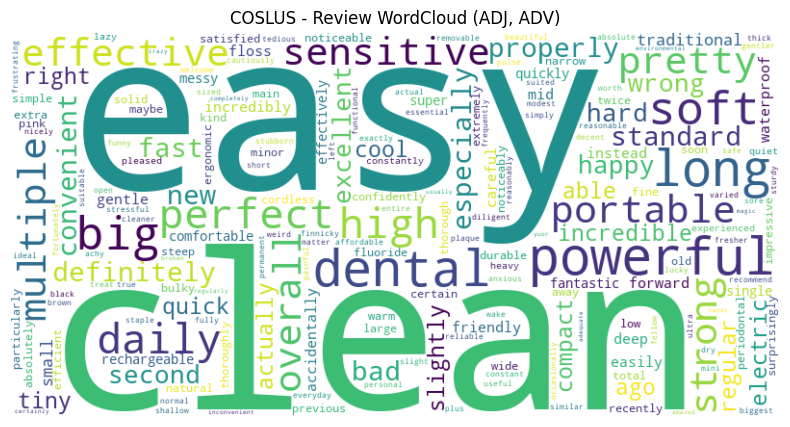

In [246]:
text_for_wordcloud_2 = ' '.join(new_list_coslus)
text_for_wordcloud_2

# Creating WordCloud
wc = WordCloud(width=800, height=400, background_color="white").generate(text_for_wordcloud_2)

# Visualization
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("COSLUS - Review WordCloud (ADJ, ADV)")
plt.show()

### Defining emotional word dictionary for Sentiment Analysis

In [247]:
emo_dict = {"positive":['satisfied','impressive','perfect','ideal','portable','thorough','quiet','compact','comfortable','easy', 'impressed', 'affordable', 'efficient', 'effective', 'quiet', 'helpful', 'glad', 'happy', 'compact', 'special', 'cool', 'nice', 'beautiful', 'powerful', 'cordless', 'reasonable'],
            'negative':['bulky', 'massive', 'skeptical', 'crooked', 'inefficient', 'bad', 'ineffective', 'wrong', 'achy', 'pain', 'painful','hard','messy', 'panicked','hazard', 'stupid', 'skeptical', 'crazy', 'broken', 'uncovered', 'frustrating', 'stressful', 'anxious', 'plaque', 'stubborn']}

In [248]:
words_counts_coslus.keys()

dict_keys(['incredible', 'portable', 'absolute', 'oral', 'clean', 'useful', 'good', 'long', 'far', 'great', 'powerful', 'quick', 'ago', 'cool', 'sure', 'removable', 'easily', 'big', 'easy', 'nice', 'floss', 'excellent', 'soon', 'multiple', 'black', 'bulky', 'right', 'pretty', 'modest', 'similar', 'electric', 'beautiful', 'definitely', 'incredibly', 'sensitive', 'bad', 'maybe', 'sore', 'achy', 'away', 'different', 'second', 'standard', 'biggest', 'tiny', 'stressful', 'extra', 'careful', 'accidentally', 'dry', 'anxious', 'open', 'overall', 'lucky', 'little', 'mini', 'truly', 'treat', 'able', 'high', 'cautiously', 'fellow', 'simply', 'confidently', 'permanent', 'compact', 'perfect', 'ideal', 'constant', 'especially', 'pulse', 'waterproof', 'strong', 'noticeably', 'fresher', 'plaque', 'convenient', 'effective', 'affordable', 'highly', 'dental', 'reasonable', 'mid', 'daily', 'reasonably', 'sized', 'friendly', 'particularly', 'stubborn', 'narrow', 'new', 'soft', 'kind', 'finnicky', 'normal',

In [249]:
# Product 1
pos_cnt = 0 
neg_cnt = 0 
for w in word_counts.keys():
    if w in emo_dict['positive']:
        pos_cnt += words_counts_coslus[w]
    elif w in emo_dict['negative']:
        neg_cnt += words_counts_coslus[w]
print(pos_cnt, neg_cnt)

86 21


In [250]:
# Product 2 
pos_cnt = 0 
neg_cnt = 0 
for w in words_counts_coslus.keys():
    if w in emo_dict['positive']:
        pos_cnt += words_counts_coslus[w]
    elif w in emo_dict['negative']:
        neg_cnt += words_counts_coslus[w]
print(pos_cnt, neg_cnt)


102 35


### Conclusions
In conclusion, the Nicwell Water Dental Flosser and COSLUS Water Pick are both user-friendly, affordable options that provide effective cleaning and are suitable for individuals with sensitive gums. While both products are somewhat bulky, they remain portable enough for convenient use. However, a notable drawback for both models is their charging capability; reviews are mixed, with some users reporting long-lasting performance while others have experienced difficulties with charging, including failure to charge when connected to the power source after half a year. Despite these issues, the Nicwell Water Dental Flosser has received numerous positive reviews highlighting its customer service, which has led many users to rate it four stars. In contrast, the COSLUS Water Pick has faced criticism regarding its design, particularly concerning the durability of the refill lid, which is prone to breaking.

### Summary

I utilized Selenium and ChromeDriver to crawl product reviews of two products on Amazon. I mainly focused gathering title and body description of 50 reviews per product. The scraped data was organized into a DataFrame, and then I merged all titles and bodies into single strings after removing punctuation and emojis using the 're' module, ensuring that only alphabetical characters remained. The titles and bodies of the collected reviews formed the basis of my analysis.

To create visual representations of the data, I employed the WordCloud library alongside Matplotlib.pyplot. I utilized SpaCy for morpheme analysis, categorizing each token (word) by its part of speech. I only decided to use adjectives and adverbs because other parts of the speech seemed irrelevant in this research. To enhance the clarity of the evaluation, I further filtered out generic terms to lower uncertainty and confusion. For ambiguous terms that require contextual understanding, I extracted the entire review body for detailed investigations. This approach allowed to refine the list of stop words further, hence making the overall output be more helpful to the user. 

Lastly, for sentiment analysis, I used the Counter class from the collections module to count word frequencies, and then coming up with the ratio of positive to negative words. I crafted a custom dictionary of positive and negative vocabulary for this data. Ultimately, both products exhibited over 70% positive keywords in their reviews.

### Discussion
Given that each product has approximately 10,000 reviews, I focused on scraping the first five pages of reviews sorted by "Top Reviews", which are selected based on their perceived helpfulness. However, I observed that these top reviews are predominantly five-star ratings, indicating a general satisfaction among customers. In future analyses, I plan to exclude five-star reviews to ensure a more balanced representation that includes critical feedback. This approach will allow for a better understanding of the products' flaws and downsides, providing a more comprehensive view of consumer experiences.